<a href="https://colab.research.google.com/github/paucaroscanoa/Series-de-Tiemop---UNI/blob/master/Practica%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed


                   Open         High          Low        Close  Volume
Date                                                                  
2018-01-02  1302.300049  1317.599976  1302.300049  1313.699951      68
2018-01-03  1320.000000  1320.099976  1312.099976  1316.199951      42
2018-01-04  1319.400024  1322.000000  1319.400024  1319.400024       2
2018-01-05  1320.300049  1320.300049  1320.300049  1320.300049       1
2018-01-08  1319.900024  1319.900024  1314.599976  1318.599976      41
            market_value
Date                    
2018-01-02   1313.699951
2018-01-03   1316.199951
2018-01-04   1319.400024
2018-01-05   1320.300049
2018-01-08   1318.599976
Analisis Descriptivo
       market_value
count   1650.000000
mean    1687.028847
std      274.731137
min     1176.199951
25%     1433.674957
50%     1773.700012
75%     1897.899994
max     2398.399902
Identificar Valores Nulos
market_value    0
dtype: int64
Graficamos la serie


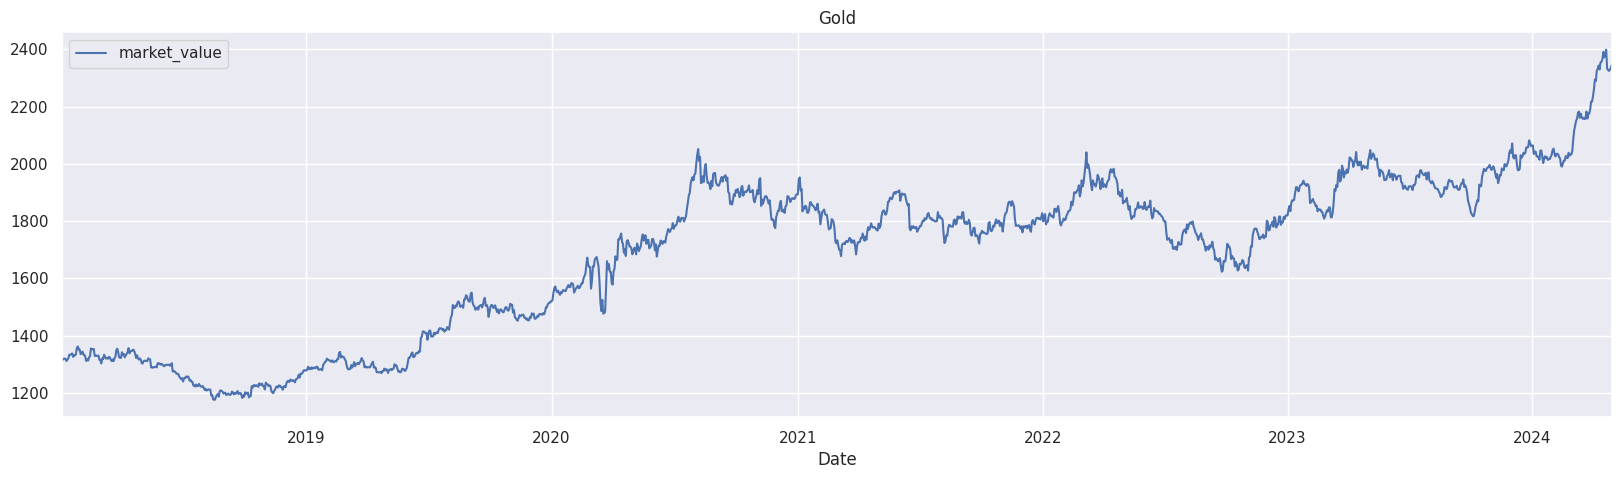

Datos para Modelo y Prueba


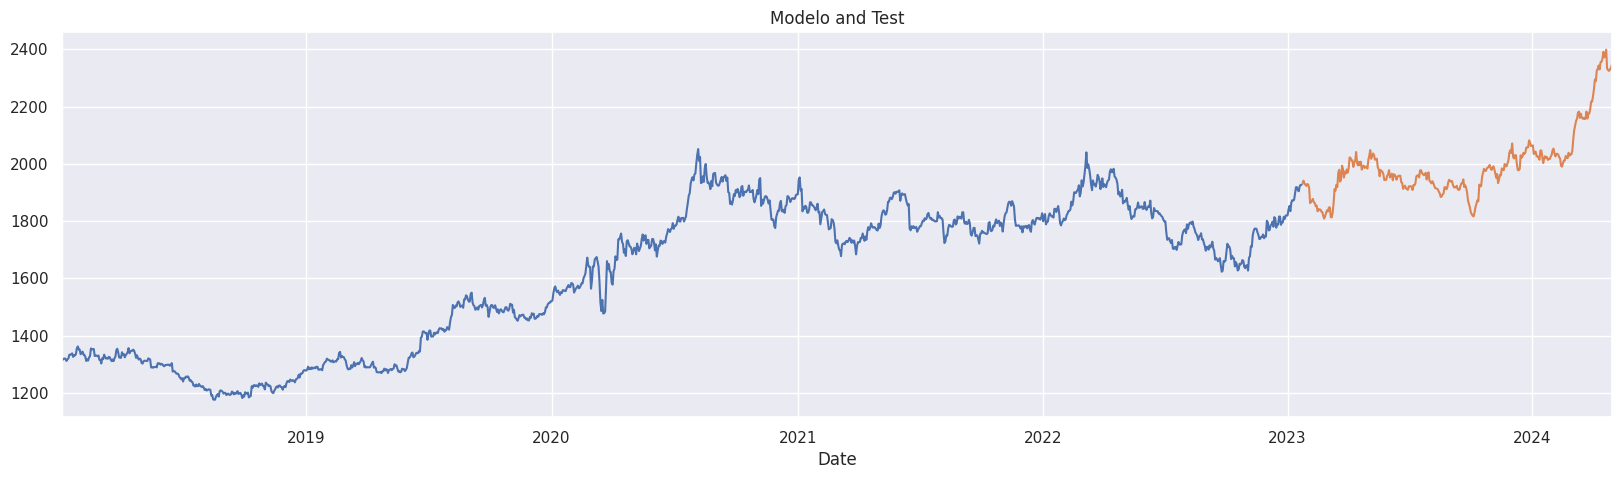

Análisis Descriptivo


<Figure size 2500x1000 with 0 Axes>

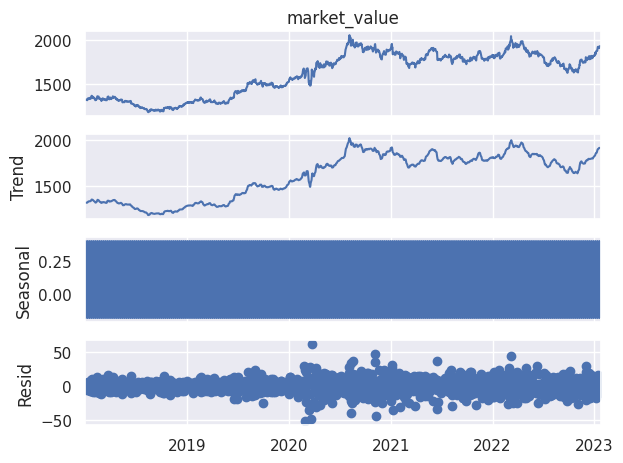

Primera diferencia, prueba de estacionariedad
Date
2018-01-02          NaN
2018-01-03     2.500000
2018-01-04     3.200073
2018-01-05     0.900024
2018-01-08    -1.700073
                ...    
2023-01-17   -11.200073
2023-01-18    -2.799927
2023-01-19    17.699951
2023-01-20     4.300049
2023-01-23     0.699951
Freq: B, Name: primera_diferencia, Length: 1320, dtype: float64
DF Test - Esacionariedad
ADF Statistic: -16.182223462043353
p-value: 4.2547199285106064e-29
ACF y PACF de la serie diferenciada sin tendencia


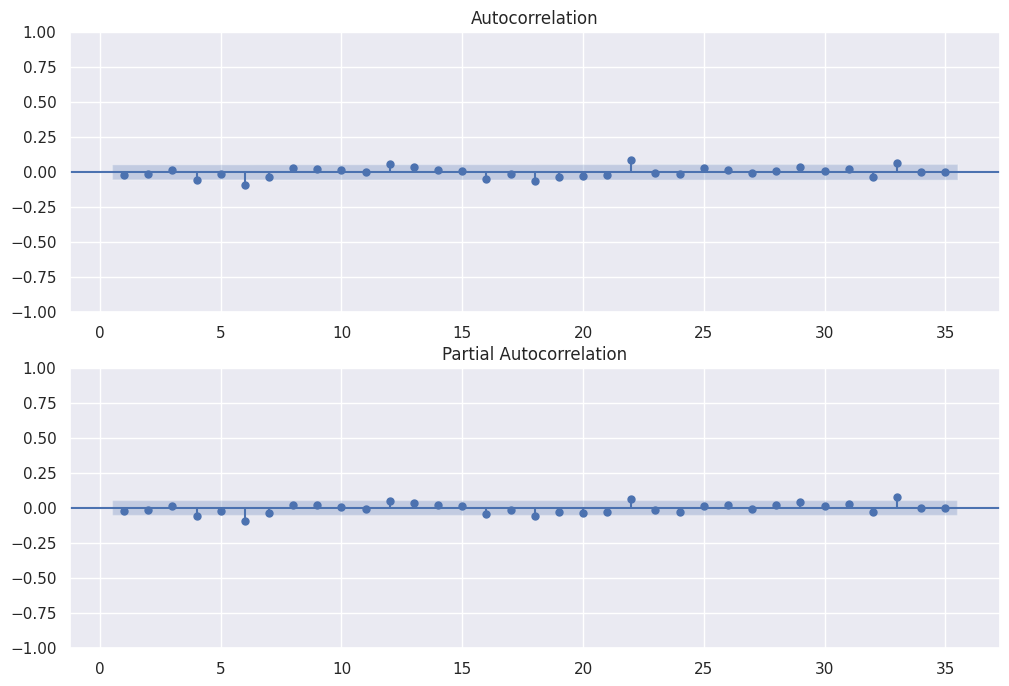

Diferenciación para eliminar la estacionalidad.
            market_value
Date                    
2018-01-10      3.700073
2018-01-11      4.400024
2018-01-12     14.000000
2018-01-15     13.099976
2018-01-16     16.800049
...                  ...
2023-01-17     34.500000
2023-01-18     32.800049
2023-01-19     47.500000
2023-01-20     30.900024
2023-01-23      8.699951

[1314 rows x 1 columns]


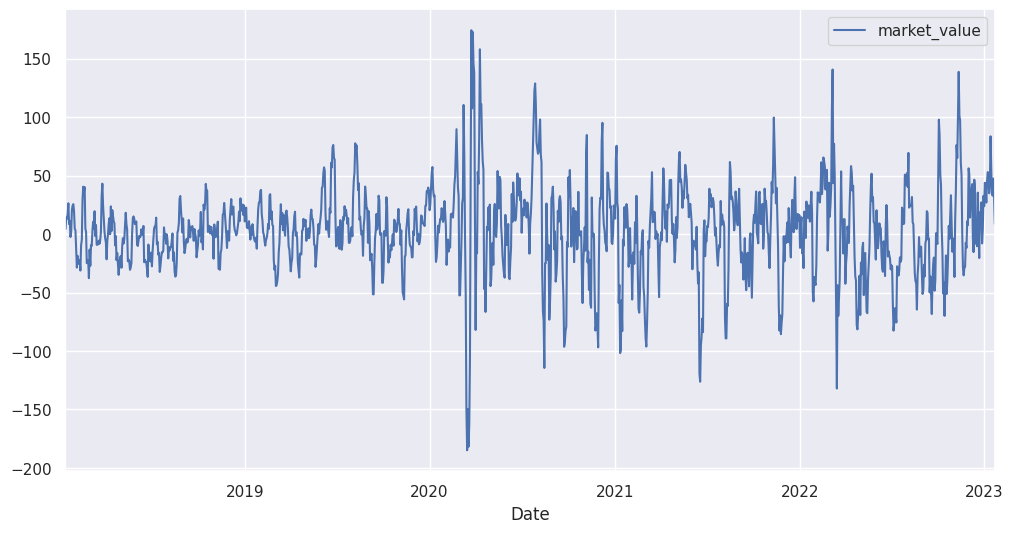

ACF y PACF de la serie diferenciada estacionalmente


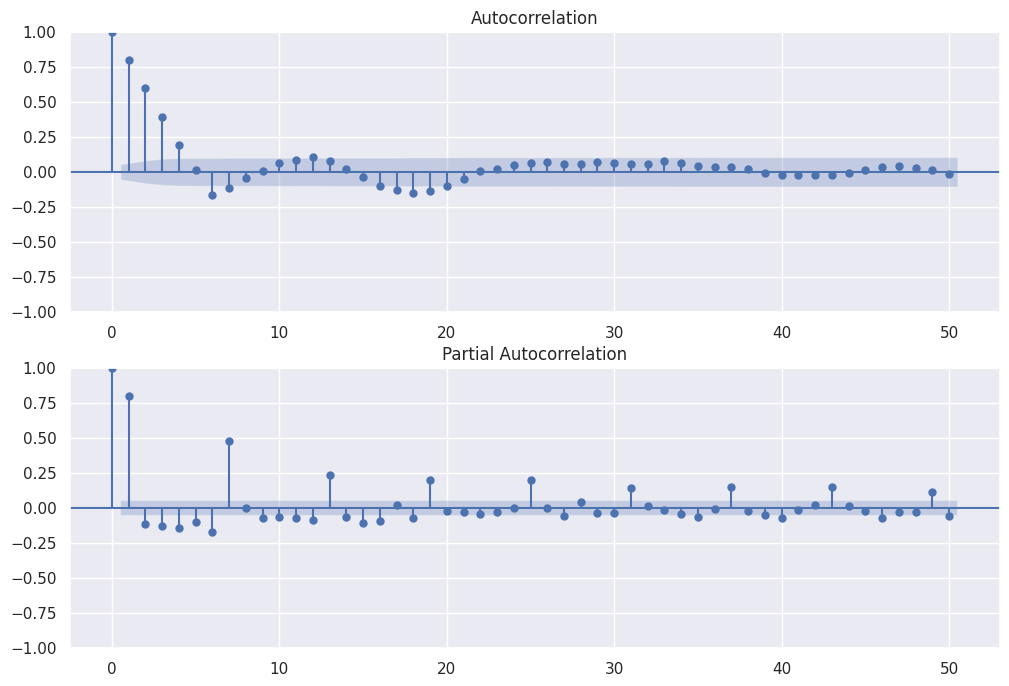

Ajuste del Modelo AR, MA, ARMA
                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 1320
Model:                 ARIMA(6, 0, 6)   Log Likelihood               -5525.672
Date:                Sun, 16 Jun 2024   AIC                          11079.345
Time:                        03:13:58   BIC                          11151.940
Sample:                    01-02-2018   HQIC                         11106.562
                         - 01-23-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1609.8166    302.753      5.317      0.000    1016.432    2203.201
ar.L1          1.4038      0.250      5.622      0.000       0.914       1.893
ar.L2         -0.9102

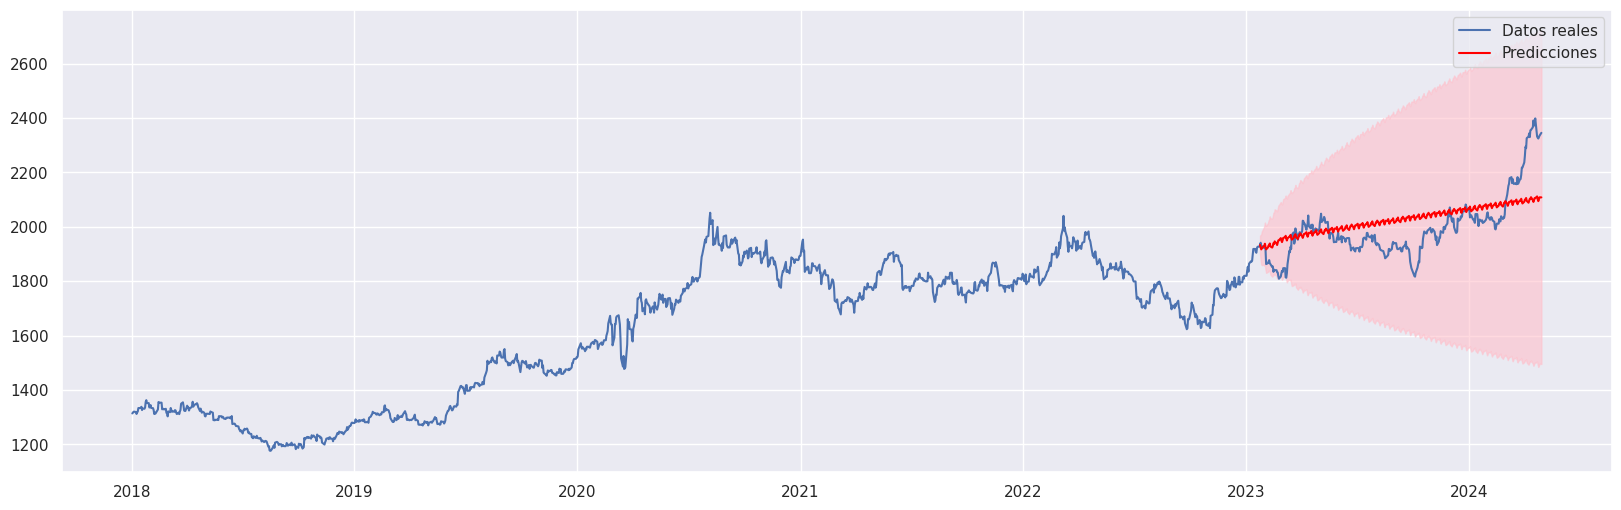

Evaluando el modelo - Datos Test vs Datos pronosticados
Mean Squared Error: 9171.168686575624


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import seaborn as sns
import warnings
sns.set()

#!pip install yfinance
import yfinance as yf
#Descargar un grupo de series o una serie de yahoo finance
raw_data = yf.download (tickers = "GC=F ", start = "2018-01-01",
                        end = "2024-04-30", interval = "1d", group_by = 'ticker', auto_adjust = True)
#Crear una copia de los datos para no alterar la base inicial.
df_comp = raw_data.copy()
#Creamos una copia para evaluar la estacionariedad haciendo la primera diferencia - elimina tendencia
#df_estacionariedad = raw_data.copy()
print(df_comp.head())
#Crear nuevas columnas con las variables de interes
#PRE PROCESADO: eliminar las variables que sobran, arreglar la frecuencia a business days y rellenar datos faltantes.
df_comp['market_value']= df_comp.Close[:]
del df_comp['Open']
del df_comp['High']
del df_comp['Low']
del df_comp['Close']
del df_comp['Volume']
df_comp=df_comp.asfreq('b') #frecuenca business day
df_comp=df_comp.fillna(method='ffill') #completar valores nulos
print(df_comp.head())
#Realizamos un analisis descriptivo previo, cantidad de datos, identificación valores nulos y graficamos la serie.
print('Analisis Descriptivo')
print(df_comp.describe())
print('Identificar Valores Nulos')
print(df_comp.isna().sum())
print('Graficamos la serie')
import matplotlib.pyplot as plt
df_comp.plot(figsize=(20,5), title = "Gold")
plt.show()
# Realizamos la división de los datos en modelo y prueba.
print('Datos para Modelo y Prueba')
size = int(len(df_comp)*0.8)
df_modelo= df_comp.iloc[:size]
df_test = df_comp.iloc[size:]
df_modelo.market_value.plot(figsize=(20,5), title = "Gold")
df_test.market_value.plot(figsize=(20,5), title = "Gold")
plt.title("Modelo and Test")
plt.show()
#Realizamos un análisis descriptivo de los datos para el modelo, descomponemos para evidenciar tendencia, ciclo, estacionalidad.
print('Análisis Descriptivo')
from statsmodels.tsa.seasonal import seasonal_decompose
s_dec_additive=seasonal_decompose(df_modelo.market_value,model='additive')
plt.figure(figsize=(25, 10))
s_dec_additive.plot()
plt.show()
# Dado la tendencia diferenciamos para poder validar estacionariedad
df_estacionariedad = df_modelo.copy()
print('Primera diferencia, prueba de estacionariedad')
df_estacionariedad['primera_diferencia'] = df_estacionariedad.market_value.diff()
warnings.filterwarnings('ignore')
print(df_estacionariedad['primera_diferencia'])
#Aplicando Dickey-Fuller para validar supuesto de estacionariedad
#H0: La serie no es estacionaria
#H1: la serie es estacionaria
print("DF Test - Esacionariedad")
ad_fuller_result = adfuller(df_estacionariedad.primera_diferencia[1:])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

# ACF y PACF de la serie diferenciada por tendencia
print('ACF y PACF de la serie diferenciada sin tendencia')
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
sgt.plot_acf(df_estacionariedad.primera_diferencia[1:],alpha = 0.05, zero =False, lags = 35, ax=ax[0])
sgt.plot_pacf(df_estacionariedad.primera_diferencia[1:], lags = 35, alpha = 0.05, method = ('ywm'), zero=False, ax=ax[1])
plt.show()

#Para determinar los parametros del componente estacional, diferenciamos con el objetivo de eliminar la estacionalidad
print('Diferenciación para eliminar la estacionalidad.')
seasonal_period = 6  # Periodicidad de 12 para datos mensuales con estacionalidad anual
data_seasonal_diff = df_modelo.diff(seasonal_period).dropna()
print(data_seasonal_diff)
# Visualizar la serie diferenciada estacionalmente
data_seasonal_diff.plot(figsize=(12, 6))
plt.show()
# ACF y PACF de la serie diferenciada estacionalmente
print('ACF y PACF de la serie diferenciada estacionalmente')
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(data_seasonal_diff, lags=50, ax=ax[0])
plot_pacf(data_seasonal_diff, lags=50, ax=ax[1])
plt.show()

#Ajustes del modelo
print('Ajuste del Modelo AR, MA, ARMA')
model_ar = ARIMA(df_modelo.market_value, order=(6,0,6))
results_ar_1 = model_ar.fit()
print(results_ar_1.summary())

print('Ajuste del Modelo  - SARIMA')

# Ajustar el modelo SARIMA
# (p, d, q) x (P, D, Q, s) - SARIMA parameters
# (p, d, q) : se determina con la ACF y PACF serie sin tendencia
# (P, D, Q, s) : se termina con la ACF y PACF serie sin estacionalidad
#SARIMA parameters
sarima_model = SARIMAX(df_modelo.market_value, order=(1, 1, 1), seasonal_order=(5, 1, 0, 6))
sarima_result = sarima_model.fit(disp=True)
print(sarima_result.summary())

# Realizar predicciones
forecast = sarima_result.get_forecast(steps=len(df_test))
forecast_index = df_test.index
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Graficar predicciones
plt.figure(figsize=(20, 6))
plt.plot(df_comp.market_value, label='Datos reales')
plt.plot(forecast_index, forecast_values, color='red', label='Predicciones')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.60)
plt.legend()
plt.show()

#Evaluar el modelo
print('Evaluando el modelo - Datos Test vs Datos pronosticados')
mse = mean_squared_error(df_test, forecast_values)
print(f'Mean Squared Error: {mse}')
